# Analyzing Arsenic Data from the NJ Private Well Testing Act
## Tomer Solomon, December 2016 

This project is analyzing data from the NJ Private Well Testing Act. In essence, this act requires NJ landowners as well as buyers/sellers of NJ property to disclose the quality of the water, and I am interested in seeing how Arsenic values have changed over time as well as which counties in NJ are most problematic when it comes to having arsenic in their water data. Hope you enjoy my project!

The link to the data can be found here: http://njdep.maps.arcgis.com/apps/MapSeries/index.html?appid=826ec9fae77543caa582a787d5f088e7

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

In [2]:
doc = 'ArsenicAllSamples_thruMar2014_for_BrianMailloux_Fe_Mn_GridID.csv'
data = pd.read_csv(doc,index_col='SAMPLE_DATE',parse_dates=['SAMPLE_DATE'])


In [3]:
data.head()

,DATA_SUBMISSION_ID,LOCATION_ID,MUNI_NAME,COUNTY_NAME,COLLECTION_PT_DESC,AnalyticLabName,ANALYTIC_METHOD,AS_QUALIFIER,AS_RESULT_VALUE,AS_RESULT_UNIT,...,FE_RESULT_UNIT,FE_REPORTING_DETECTION_LIMIT,FE_CHEMICAL_NAME,MN_QUALIFIER,MN_RESULT_VALUE,MN_RESULT_UNIT,MN_REPORTING_DETECTION_LIMIT,MN_CHEMICAL_NAME,PH_RESULT_VALUE,GRID_2M_ID
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2002-09-18,10,10,HILLSBOROUGH TWP,SOMERSET,Before Treatment,QC INC.,SM3113B,NaN,3.40,ug/l,...,mg/l,0.03,Iron,<,0.01,mg/l,0.01,Manganese,7.33,1183
2008-03-24,139584,10,HILLSBOROUGH TWP,SOMERSET,Alternative Location,QC INC.,SM3113B,NaN,5.20,ug/l,...,mg/l,0.03,Iron,<,0.01,mg/l,0.01,Manganese,7.06,1183
2012-08-10,264009,10,HILLSBOROUGH TWP,SOMERSET,Bathroom Tap,AGRA ENVIRONMENTAL AND LABORATORY SERVICES,SM3113B,NaN,4.57,ug/l,...,mg/l,0.10,Iron,<,0.03,mg/l,0.03,Manganese,7.32,1183
2002-09-03,12,12,FRANKLIN TWP,SOMERSET,Before Treatment,QC INC.,SM3113B,<,2.00,ug/l,...,mg/l,0.03,Iron,<,0.01,mg/l,0.01,Manganese,7.30,1181
2002-09-06,13,13,WEST MILFORD TWP,PASSAIC,Before Treatment,QC INC.,SM3113B,NaN,2.20,ug/l,...,mg/l,0.03,Iron,<,0.01,mg/l,0.01,Manganese,7.06,1481


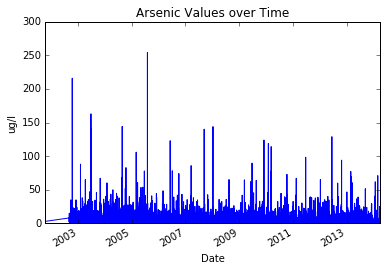

In [4]:
fig,ax = plt.subplots()
data['AS_RESULT_VALUE'].plot()
ax.set_title('Arsenic Values over Time')
plt.xlabel('Date')
plt.ylabel('ug/l')


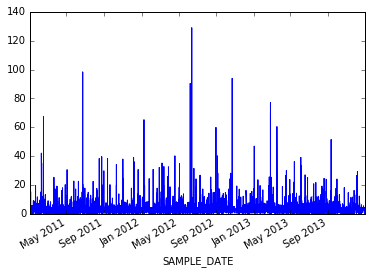

In [5]:
data.AS_RESULT_VALUE['2011':'2013'].plot()


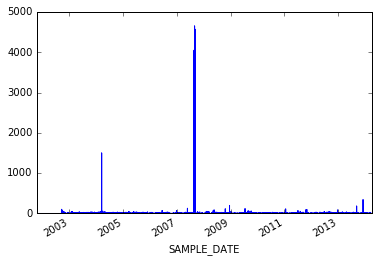

In [6]:
#not analyzing this
data['FE_RESULT_VALUE'].plot()


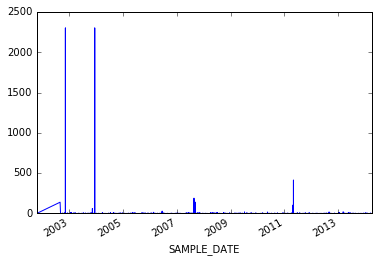

In [7]:
#not analyzing this
data['MN_RESULT_VALUE'].plot()


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


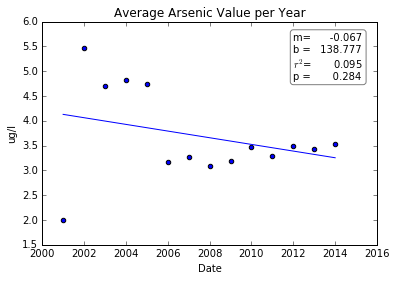

In [8]:
fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)


x = data.AS_RESULT_VALUE.resample('A',how=np.mean).index.year
y = data.AS_RESULT_VALUE.resample('A',how=np.mean)

#calculate statistics
results=stats.linregress(x,y)
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.75,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
ax.scatter(x,y)

ax.set_title('Average Arsenic Value per Year')
plt.xlabel('Date')
plt.ylabel('ug/l')

#old method
#data['AS_RESULT_VALUE'].resample('A',how='mean').plot()#marker='8',color='r',linestyle='none')


location BERGEN
mean AS value 4.69929887185
count 2739
location ESSEX
mean AS value 5.04656774194
count 155
location HUNTERDON
mean AS value 3.98902951448
count 10335
location MERCER
mean AS value 3.99264457695
count 3028
location MIDDLESEX
mean AS value 3.18706954545
count 858
location MORRIS
mean AS value 3.57112581913
count 9919
location PASSAIC
mean AS value 4.12207133121
count 4402
location SOMERSET
mean AS value 4.37061592535
count 5787
location SUSSEX
mean AS value 2.91382444949
count 3524
location WARREN
mean AS value 3.03657856343
count 2144


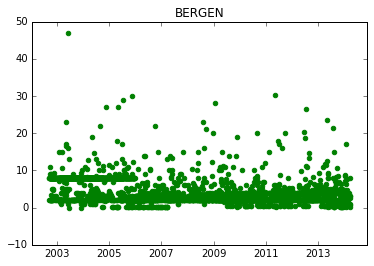

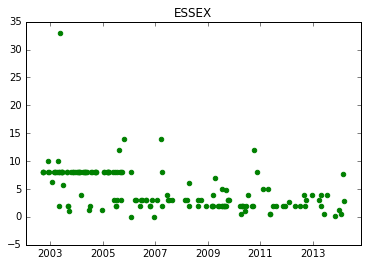

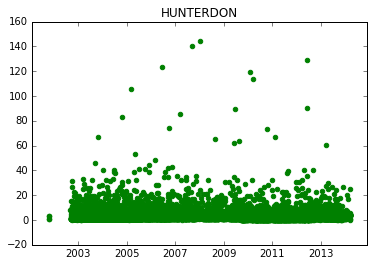

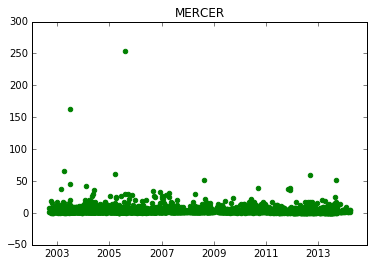

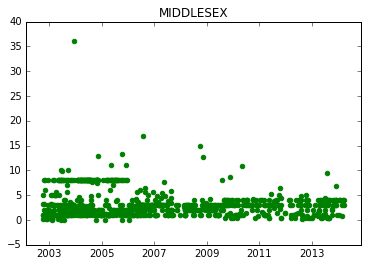

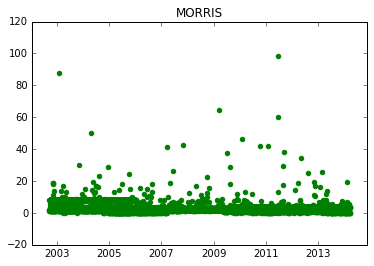

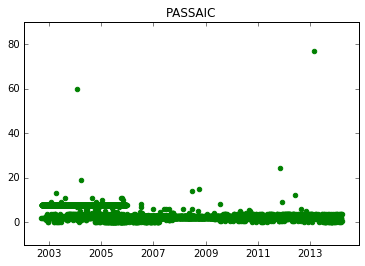

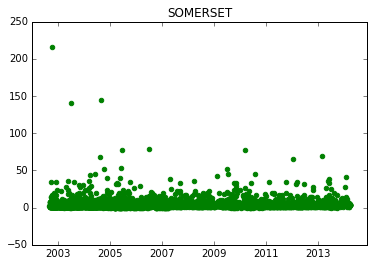

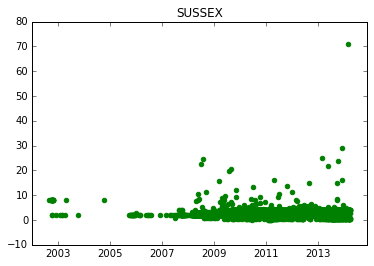

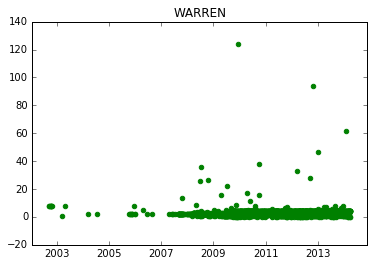

In [18]:
# for county name

for locat, df_group in data.groupby('COUNTY_NAME'):
    if df_group.AS_RESULT_VALUE.count() > 100:
        print 'location',locat
        print "mean AS value", df_group.AS_RESULT_VALUE.mean()
        print "count", df_group.AS_RESULT_VALUE.count()
        #print df_group
        fig,ax=plt.subplots()
        ax.scatter(df_group.index,df_group.AS_RESULT_VALUE,color = 'g')
        ax.set_title('{}'.format(locat))
        


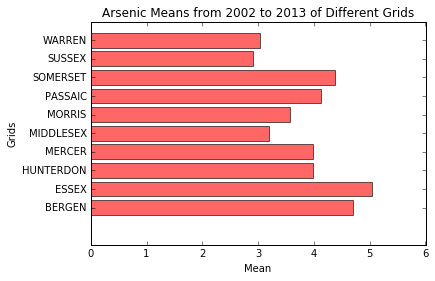

In [12]:
#for county name

location_grid = []
mean_grid = []
for locat, df_group in data.groupby('COUNTY_NAME'):
    if df_group.AS_RESULT_VALUE.count() > 100:
        location_grid.append(locat)
        mean_grid.append(df_group.AS_RESULT_VALUE.mean())
        
y_position = np.arange(len(location_grid))

 
plt.barh(y_position, mean_grid, align='center', color = 'r', alpha=0.6,label="test")
plt.yticks(y_position, location_grid)
plt.ylabel('Grids')
plt.xlabel('Mean')

plt.title('Arsenic Means from 2002 to 2013 of Different Grids')
 
plt.show()